In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

from filter import (
    create_gaussian_kernel,
    gaussian_filter_numpy,
    gaussian_filter_opencv,
)

os.makedirs('results', exist_ok=True)
os.makedirs('kernels', exist_ok=True)

Загрузим цветное и чёрно-белое изображения для размытия.

In [33]:
image = cv2.imread('image.png')  # Цветное изображение
image_gray = cv2.imread('maxresdefault.jpg', cv2.IMREAD_GRAYSCALE)  # Чёрно-белое
sigmas = [0.5, 1.5, 5.0]
kernel_sizes = [(3, 3), (7, 7), (21, 21)]

Проверим, как взаимосвязаны значения сигмы и размера ядра.

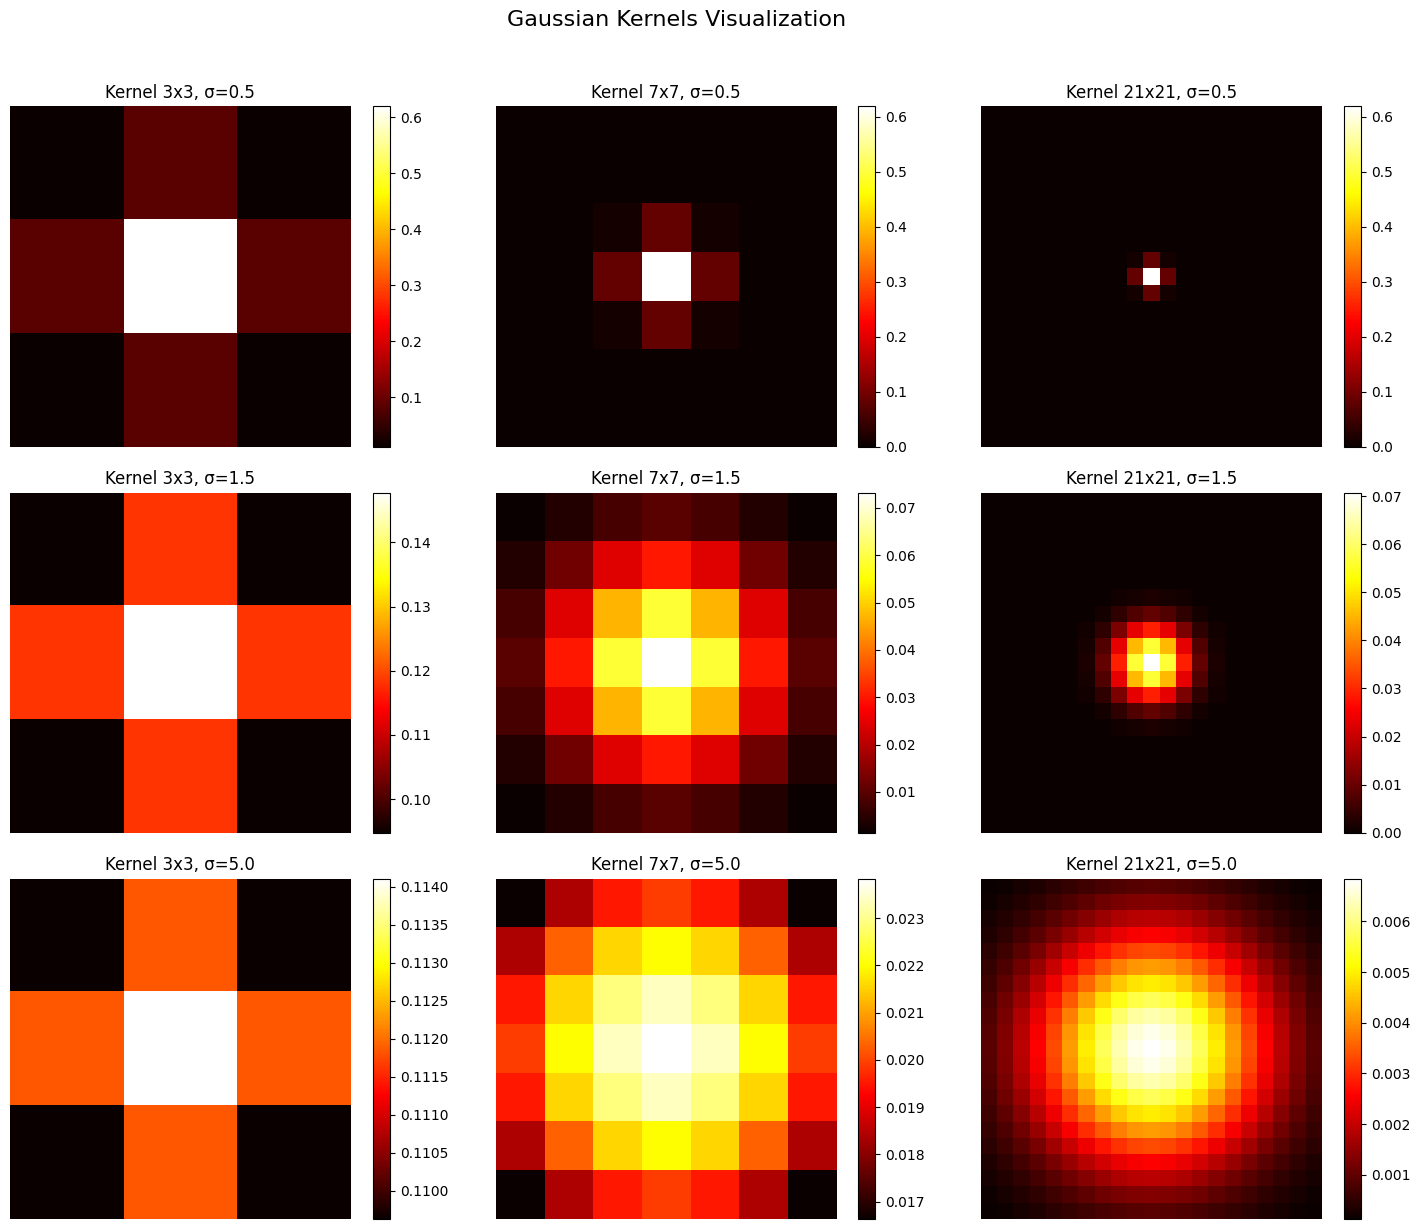

In [34]:
fig, axes = plt.subplots(len(sigmas), len(kernel_sizes), figsize=(15, 12))

for i, sigma in enumerate(sigmas):
    for j, ksize in enumerate(kernel_sizes):
        kernel = create_gaussian_kernel(ksize[0], sigma)
        
        im = axes[i, j].imshow(kernel, cmap='hot', interpolation='nearest')
        axes[i, j].set_title(f'Kernel {ksize[0]}x{ksize[0]}, σ={sigma}')
        axes[i, j].axis('off')
        plt.colorbar(im, ax=axes[i, j], fraction=0.046)

plt.suptitle('Gaussian Kernels Visualization', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('kernels/all_kernels.png', dpi=150, bbox_inches='tight')
plt.show()

Сравнение производительности нативной реализации с помощью Numpy и с помощью OpenCV.

In [ ]:
import time
import numpy as np

# Параметры фильтра
ksize = (7, 7)
sigma = 1.5
num_iterations = 5

# OpenCV (color)
opencv_times = []
for _ in range(num_iterations):
    start = time.perf_counter()
    opencv_result = gaussian_filter_opencv(image, ksize, sigma)
    opencv_times.append((time.perf_counter() - start) * 1000)
opencv_time = np.mean(opencv_times)

# NumPy (color)
numpy_times = []
for _ in range(num_iterations):
    start = time.perf_counter()
    numpy_result = gaussian_filter_numpy(image, ksize, sigma)
    numpy_times.append((time.perf_counter() - start) * 1000)
numpy_time = np.mean(numpy_times)

# OpenCV (grayscale)
opencv_gray_times = []
for _ in range(num_iterations):
    start = time.perf_counter()
    opencv_gray_result = gaussian_filter_opencv(image_gray, ksize, sigma)
    opencv_gray_times.append((time.perf_counter() - start) * 1000)
opencv_gray_time = np.mean(opencv_gray_times)

# NumPy (grayscale)
numpy_gray_times = []
for _ in range(num_iterations):
    start = time.perf_counter()
    numpy_gray_result = gaussian_filter_numpy(image_gray, ksize, sigma)
    numpy_gray_times.append((time.perf_counter() - start) * 1000)
numpy_gray_time = np.mean(numpy_gray_times)

speedup_color = numpy_time / opencv_time if opencv_time > 0 else 0
speedup_gray = numpy_gray_time / opencv_gray_time if opencv_gray_time > 0 else 0

# Сохраняем результирующие изображения
cv2.imwrite(f'results/opencv_k{ksize[0]}_s{sigma}_color.png', opencv_result)
cv2.imwrite(f'results/numpy_k{ksize[0]}_s{sigma}_color.png', numpy_result)
cv2.imwrite(f'results/opencv_k{ksize[0]}_s{sigma}_gray.png', opencv_gray_result)
cv2.imwrite(f'results/numpy_k{ksize[0]}_s{sigma}_gray.png', numpy_gray_result)

# Результаты
print(f"Kernel: {ksize[0]}x{ksize[0]}, Sigma: {sigma}")
print("=" * 60)
print(f"{'Method':<20} {'Color (ms)':<15} {'Gray (ms)':<15}")
print("-" * 60)
print(f"{'OpenCV':<20} {opencv_time:<15.3f} {opencv_gray_time:<15.3f}")
print(f"{'NumPy':<20} {numpy_time:<15.3f} {numpy_gray_time:<15.3f}")
print("-" * 60)
print(f"{'Speedup (NumPy/OpenCV)':<20} {speedup_color:<15.1f}x {speedup_gray:<14.1f}x")
print("=" * 60)


Kernel: 7x7, Sigma: 1.5
Method               Color (ms)      Gray (ms)      
------------------------------------------------------------
OpenCV               1.195           0.514          
NumPy                6524.472        4760.046       
------------------------------------------------------------
Speedup (NumPy/OpenCV) 5457.8         x 9255.4        x
